# API to retrieve user preferences from TMDB

### 🎬 Jeu de données MovieLens 1M

Dans cette section, nous utilisons le jeu de données **MovieLens 1M**, une base de données publique contenant **1 million de notations** de films réalisées par environ **6 000 utilisateurs** sur plus de **3 900 films**.

Ces données sont largement utilisées pour l’expérimentation et la recherche dans les **systèmes de recommandation**.

---


In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## 1). Getting the data

### 🧱 DataFrames obtenus

Après importation et nettoyage, nous obtenons les trois DataFrames suivants :

#### 1️⃣ `users`

| Colonne | Description |
|----------|--------------|
| `UserID` | Identifiant unique de l’utilisateur |
| `Gender` | Sexe (`M` ou `F`) |
| `Age` | Tranche d’âge (ex : 18, 25, 35, etc.) |
| `Occupation` | Code numérique de profession |
| `Zip-code` | Code postal (principalement US) |

---

#### 2️⃣ `movies`

| Colonne | Description |
|----------|--------------|
| `MovieID` | Identifiant unique du film |
| `Title` | Titre du film avec l’année de sortie |
| `Genres` | Liste des genres associés (séparés par `|`, ex : `Comedy|Romance`) |

---

#### 3️⃣ `ratings`

| Colonne | Description |
|----------|--------------|
| `UserID` | Identifiant de l’utilisateur ayant noté le film |
| `MovieID` | Identifiant du film noté |
| `Rating` | Note attribuée (de 1 à 5) |
| `Timestamp` | Date/heure de la notation (au format Unix) |

---

In [31]:
df_user_info = pd.read_csv("/home/onyxia/work/projet_python_films/Data_users/users.dat",
    sep="::",
    engine="python",  
    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"]
)

df_users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [21]:
df_films = pd.read_csv(
    "/home/onyxia/work/projet_python_films/Data_users/movies.dat",
    sep="::",
    engine="python",
    names=["MovieID", "Title", "Genres"], 
    encoding="ISO-8859-1"
)

df_films


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [26]:
df_ratings = pd.read_csv(
    "/home/onyxia/work/projet_python_films/Data_users/ratings.dat",
    sep="::",
    engine="python",
    names=["UserID", "MovieID", "Rating", "Timestamp"],
    encoding="ISO-8859-1"  # important for accented characters
)

df_ratings


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [76]:
# Harmoniser les types de clé avant la fusion
df_ratings["MovieID"] = df_ratings["MovieID"].astype(int)
df_users["UserID"] = df_user_info["UserID"].astype(int)
df_films["MovieID"] = df_films["MovieID"].astype(int)

# Fusion
df_users = (
    df_ratings
    .merge(df_user_info, on="UserID")
    .merge(df_films, on="MovieID")
)

df_users

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


### 2). Cleaning the data

In [77]:
# Function to clean the data 
def clean_df(df): 
    # Drop 'Timestep' column
    df.drop(columns=["Timestamp"])
    # Convert 'Genres' string to list
    df["Genres"] = df["Genres"].apply(lambda x: x.split("|") if isinstance(x, str) else [])
    # Transform 'Gender' to binary values 
    df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "F" else 0)
    return df

# Apply to df_users 
df_users=clean_df(df_users)

# Check result
df_users.head()


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,1,1,10,48067,One Flew Over the Cuckoo's Nest (1975),[Drama]
1,1,661,3,978302109,1,1,10,48067,James and the Giant Peach (1996),"[Animation, Children's, Musical]"
2,1,914,3,978301968,1,1,10,48067,My Fair Lady (1964),"[Musical, Romance]"
3,1,3408,4,978300275,1,1,10,48067,Erin Brockovich (2000),[Drama]
4,1,2355,5,978824291,1,1,10,48067,"Bug's Life, A (1998)","[Animation, Children's, Comedy]"


In [94]:
df_users["Age"].value_counts()

Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: count, dtype: int64

## 3). Data Processing

### Exploring the user base

In [66]:
# Number of users 
total_users = df_users["UserID"].nunique()
print("Total number of unique users:", total_users)

Total number of unique users: 6040


Gender
Female    4331
Male      1709
Name: UserID, dtype: int64


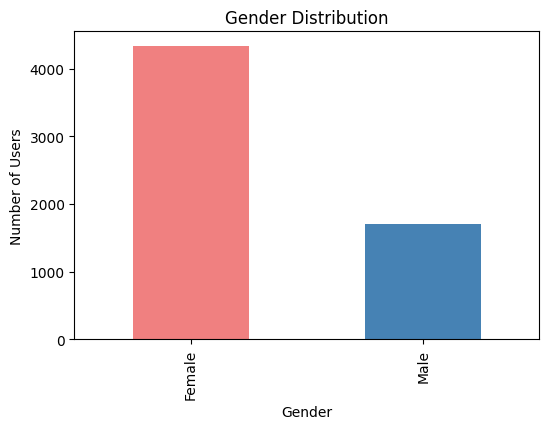

In [91]:
# Number of men and women
gender_counts = df_users.groupby("Gender")["UserID"].nunique().rename({1: "Male", 0: "Female"})
print(gender_counts)

plt.figure(figsize=(6, 4))
gender_counts.plot(kind="bar", color=["lightcoral", "steelblue"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.show()



In [101]:
# Age distribution

# Count unique users per age code
age_counts = (
    df_users.groupby("Age")["UserID"].nunique()
    .rename_axis("Age")
    .reset_index(name="UserCount")
)

# Define mapping for all expected codes
age_labels = {
    0: "Under 18",
    1: "18-24",
    2: "25-34",
    3: "35-44",
    4: "45-49",
    5: "50-55",
    6: "56+"
}

# Replace codes with readable labels, drop unexpected or missing ages
age_counts["AgeGroup"] = age_counts["Age"].map(age_labels)

# Make sure labels are ordered correctly
order = ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]
age_counts["AgeGroup"] = pd.Categorical(age_counts["AgeGroup"], categories=order, ordered=True)

# Sort and ensure proper string dtype for plotting
age_counts = age_counts.sort_values("AgeGroup")
age_counts["AgeGroup"] = age_counts["AgeGroup"].astype(str)

""" # Plot
plt.figure(figsize=(8, 5))
plt.bar(age_counts["AgeGroup"], age_counts["UserCount"], color="cornflowerblue")
plt.title("User Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show() """

print(age_counts)

   Age  UserCount AgeGroup
0    1        222    18-24
1   18       1103      nan
2   25       2096      nan
3   35       1193      nan
4   45        550      nan
5   50        496      nan
6   56        380      nan


### Exploring the movie base

In [ ]:
# Number of movies 

In [ ]:
# Movie genres 

### Rating analysis

In [62]:
# Movies with the biggest number of ratings

In [63]:
# Highest ranked movies on average 

In [64]:
# Favourite genres by sex

In [65]:
# Favourite genres by age 

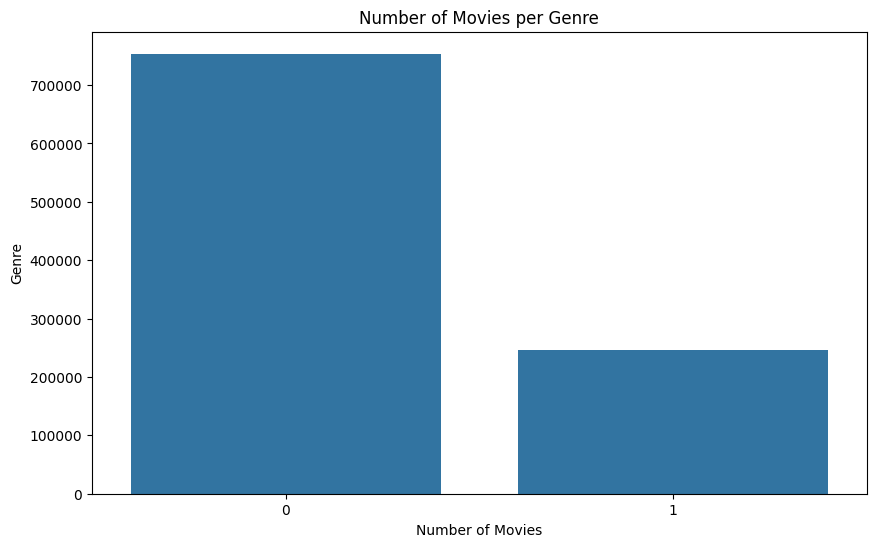

Gender
0    753769
1    246440
Name: count, dtype: int64


In [ ]:

df_exploded_genders = df_users.explode('Gender')

gender_counts = df_exploded_genders['Gender'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title("Number of Movies per Genre")
plt.xlabel("Gender")
plt.ylabel("Genre")
plt.show()

print(gender_counts)

### Age

### Genre